# 1. Introduction and Problem Statement

### Objective:

#### Financial institutions face risk when approving loans. A key challenge is determining whether a loan applicant is likely to default or repay based on their profile. This task aims to develop a basic machine learning model to predict credit risk using applicant details.

### Problem Statement:

#### As a data scientist, i have assigned to analyze loan application data and predict the likelihood of loan approval (Loan_Status). The company wants to:
- **Minimize risk by identifying high-risk applicants**

- **Speed up decision-making by automating loan approvals**

#### My goal is to:

- **Explore the dataset**

- **Clean and prepare it for modeling**

- **Train a classification model (e.g., Logistic Regression or Decision Tree)**

- **Evaluate performance using accuracy and confusion matrix**

#### This solution will support the business in improving its loan approval pipeline while reducing default risk.

# 2. Dataset Understanding and Description

### Dataset:

#### I'm using a public Loan Risk Prediction dataset, which contains both numerical and categorical information about applicants. 
### Key Features: 
- Age
- Gender
- Home
- Emp_length
- Intent
- Amount
- Rate
- Status
- Percent_income
- Cred_length
-  Target Variable: Default (Y/N)

# 3. Data Loading and Initial Inspection

## Import Required Libraries

In [11]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
## Changing plotting style for better graphs and understanding
sns.set(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (8, 5)

## Load the Dataset

In [14]:
df = pd.read_csv("Loan prediction mini dataset.csv")
# preview
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,13116,23,88000,MORTGAGE,2.0,MEDICAL,6625,11.22,0,0.08,Y,3
1,1742,23,30000,RENT,0.0,PERSONAL,1925,12.18,0,0.06,N,2
2,27672,32,160000,MORTGAGE,9.0,DEBTCONSOLIDATION,12000,7.88,0,0.07,N,8
3,24694,29,75000,OWN,3.0,HOMEIMPROVEMENT,12000,7.51,0,0.16,N,5
4,1994,22,28800,RENT,2.0,VENTURE,14000,7.90,1,0.49,N,2


## Dataset Structure Overview

In [16]:
# Dataset shape
print("Dataset shape:", df.shape)
# Columns
print("columns:", df.columns.tolist())

# Data types and non-null counts
df.info()

Dataset shape: (8145, 12)
columns: ['Id', 'Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate', 'Status', 'Percent_income', 'Default', 'Cred_length']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8145 entries, 0 to 8144
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              8145 non-null   int64  
 1   Age             8145 non-null   int64  
 2   Income          8145 non-null   int64  
 3   Home            8145 non-null   object 
 4   Emp_length      7909 non-null   float64
 5   Intent          8145 non-null   object 
 6   Amount          8145 non-null   int64  
 7   Rate            7383 non-null   float64
 8   Status          8145 non-null   int64  
 9   Percent_income  8145 non-null   float64
 10  Default         8145 non-null   object 
 11  Cred_length     8145 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 763.7+ KB


## Statistical Summary

In [18]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,8145.000000,8145.000000,8.145000e+03,7909.000000,8145.000000,7383.000000,8145.000000,8145.000000,8145.000000
mean,16269.966974,27.689748,6.528496e+04,4.728790,9695.656845,11.040731,0.218171,0.171769,5.767342
std,9394.610528,6.229731,5.278421e+04,3.991919,6389.975388,3.226149,0.413029,0.106168,3.981448
min,4.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8134.000000,23.000000,3.860400e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16280.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24325.000000,30.000000,7.800000e+04,7.000000,12500.000000,13.470000,0.000000,0.230000,8.000000
max,32579.000000,144.000000,1.900000e+06,41.000000,35000.000000,21.740000,1.000000,0.770000,30.000000


### Initial Observations:
#### The dataset contains information on loan applicants’ demographic and financial background, including age, income, loan amount, credit history, and employment details.
#### A quick inspection shows:

- **The dataset is well-structured, with a mix of categorical and numerical features.**

- **The target variable Default indicates whether the applicant defaulted (Y) or not (N).**

- **Variables like Rate, Amount, and Percent_income are likely to have a strong impact on loan default probability.**

# 4. Data Cleaning and Handling Missing Values

In [21]:
## Check missing values
df.isnull().sum()

Id                  0
Age                 0
Income              0
Home                0
Emp_length        236
Intent              0
Amount              0
Rate              762
Status              0
Percent_income      0
Default             0
Cred_length         0
dtype: int64

In [22]:
# Fill missing employment length with 0
df['Emp_length'] = df['Emp_length'].fillna(0)

# Dropping rows where interest rate is missing
df = df.dropna(subset=['Rate'])

In [23]:
## Shape after dropping rows
df.shape

(7383, 12)

### Data Cleaning Summary:
#### I handled missing employment length by treating it as "0", preserving those applications for modeling.
#### However, missing interest rates (Rate) were removed entirely, as loan pricing is crucial for risk assessment.
#### This ensures we train the model only on valid, complete applications — reducing the risk of poor generalization.   

### Duplicates

In [26]:
df.duplicated().sum()

0

#### No duplicate records found in the dataset, which means each loan application is unique.

### Data Types

In [29]:
df.dtypes

Id                  int64
Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

### Cleaning Outcome:
-  **Handled missing values in a business-aware way:**

    - #### Emp_length filled with "Unknown"

    - #### Rows with missing Rate were dropped
 
- **Confirmed that:**

    - #### No duplicates exist

    - #### All columns have correct data types (categorical, numerical)

    - #### Dataset is now ready for exploratory visualizations and modeling

# 5. Exploratory Data Analysis (EDA)

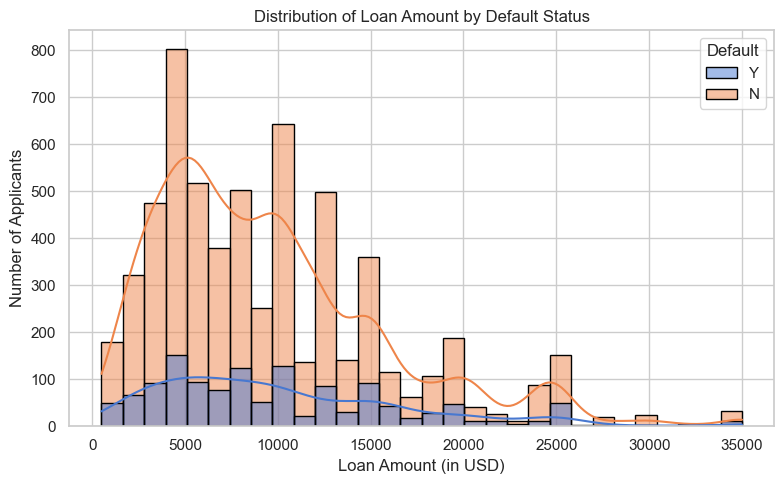

In [32]:
# Histogram to visualize the distribution of loan amounts by default status
sns.histplot(data=df, x='Amount', hue='Default', kde=True, bins=30, palette='muted', edgecolor='black')
plt.title("Distribution of Loan Amount by Default Status")
plt.xlabel("Loan Amount (in USD)")
plt.ylabel("Number of Applicants")
plt.tight_layout()
plt.show()

#### Insight:

#### The histogram reveals that most applicants who did not default (Default = N) applied for loans between $5,000 and $15,000, with peak activity around $5,000-$10,000 (over 500 applications in some bins).

#### On the other hand, applicants who defaulted (Default = Y) were fewer overall. Their loan amounts were spread across similar ranges but concentrated below ~$25,000, and they rarely requested higher amounts beyond that.

#### The **KDE curves** suggest that while both groups technically extend to higher loan amounts (~$35,000), defaults are much less frequent in those higher ranges, possibly because fewer risky profiles are approved for large loans.

## Box Plot of Interest Rate vs Default Status

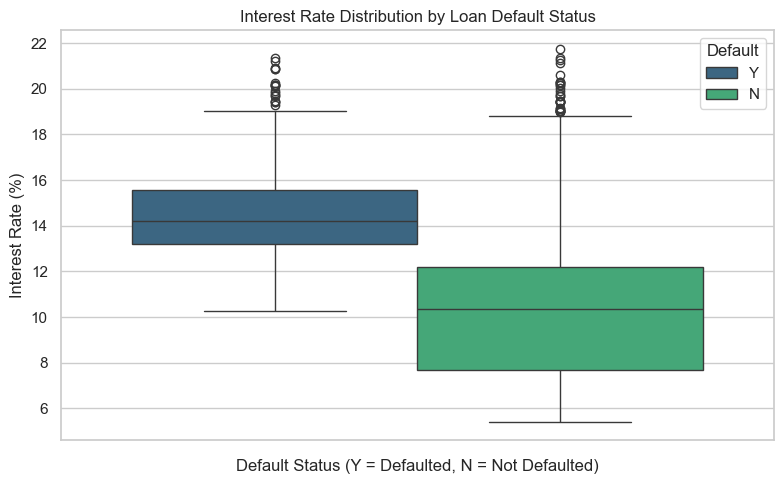

In [35]:
# Box plot of interest rates grouped by default status
sns.boxplot(data=df, hue='Default', y='Rate', palette='viridis')
plt.title("Interest Rate Distribution by Loan Default Status")
plt.xlabel("Default Status (Y = Defaulted, N = Not Defaulted)")
plt.ylabel("Interest Rate (%)")
plt.tight_layout()
plt.show()

### Insight:
The box plot reveals a clear difference in interest rates between defaulters and non-defaulters:

- #### Applicants who defaulted (Default = Y) typically received higher interest rates, with a median around 14%, compared to 10% for those who didn’t default.

- #### The IQR for defaulters is tighter (13–16%), indicating more consistency in how risky applicants are priced.

- #### Non-defaulters (N) show more variability, with rates spread from 6% to 20%, and more outliers — likely reflecting a wider diversity of financial profiles.

### This suggests that higher interest rates may correlate with increased risk, but also that some low-risk applicants are being offered high rates, which may need deeper policy review.

## Count Plot of Loan Intent vs Default Status

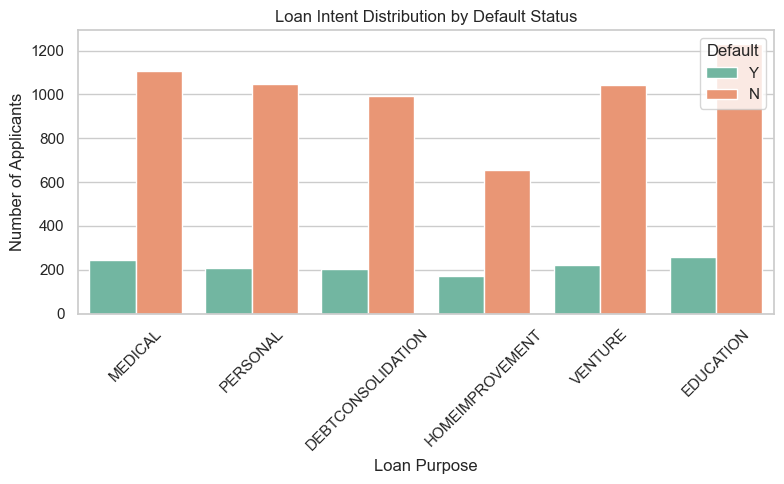

In [38]:
# Count plot to show the number of defaults and non-defaults by loan intent
sns.countplot(data=df, x='Intent', hue='Default', palette='Set2')
plt.title("Loan Intent Distribution by Default Status")
plt.xlabel("Loan Purpose")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insight:
This chart highlights how loan default rates vary by loan purpose:

- #### The highest number of defaults occurred in Education, Medical, and Venture loans, suggesting these may carry higher credit risk.

- #### Home Improvement loans have the lowest default counts, which may indicate better creditworthiness or more collateral-based borrowing.

- #### Although non-defaults dominate across all categories, the consistently high number of defaults in personal and medical loans suggests these applicants may face financial instability post-disbursement.

### This insight can help the business refine risk-weighted interest rates or build stricter approval criteria for specific loan intents like Education or Venture funding.

### Correlation Heatmap of Numerical Features

In [41]:
## Encoding Default into binary
mapping = {
    "Y":1,
    "N":0
}
df['Default'] = df['Default'].map(mapping).astype(int)

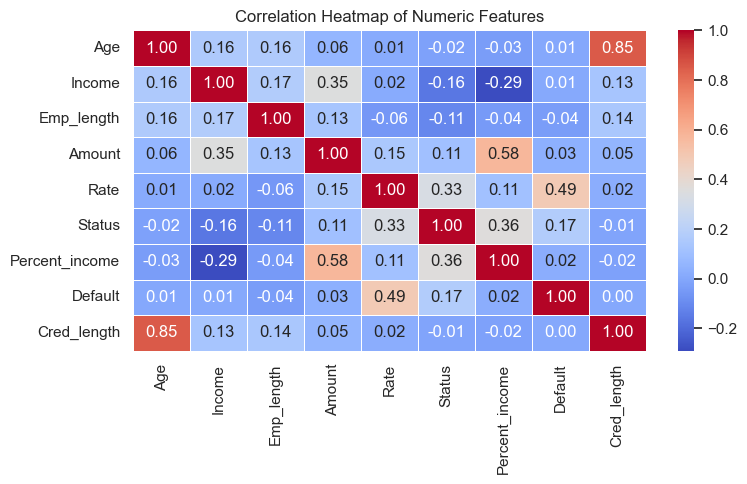

In [42]:
# Droping 'Id' from correlation to avoid misleading correlation
numeric_cols = df.select_dtypes(include='number').columns.drop('Id')
corr = df[numeric_cols].corr()
# Heatmap of correlations
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

### Insight:
##### The heatmap reveals a few key relationships:

- #### Age and Credit Length (0.85) — Strong positive correlation, which makes sense: older applicants tend to have longer credit histories.

- #### Loan Amount and Percent Income (0.58) — Moderate correlation, indicating that requested loan size increases with applicant income (relative to income).

- #### Rate and Default (0.49) — This is the most important: higher interest rates are moderately correlated with defaulting, which aligns with earlier box plot findings.

- #### Income and Percent Income (-0.29) — A negative relationship here is expected, since Percent_income is likely calculated as Amount / Income.

##### These insights guide feature selection and hint that Rate, Income, and Percent_income may be useful predictors for our classification model.

### Box Plot of Income vs Default

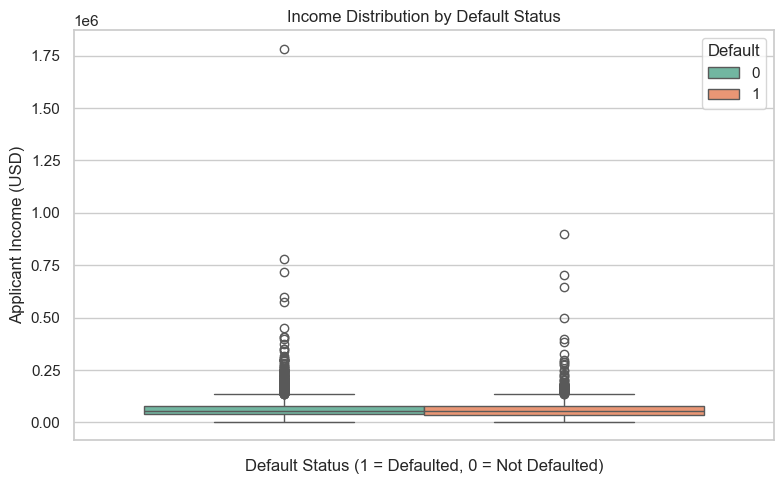

In [45]:
# Box plot of income by default status
sns.boxplot(data=df, hue='Default', y='Income', palette='Set2')
plt.title("Income Distribution by Default Status")
plt.xlabel("Default Status (1 = Defaulted, 0 = Not Defaulted)")
plt.ylabel("Applicant Income (USD)")
plt.tight_layout()
plt.show()

### Insight:
#### This box plot shows that income distributions are highly right-skewed for both defaulters and non-defaulters, with most applicants earning at the lower end of the scale.
#### The median income and interquartile ranges are very similar across both groups, suggesting that typical income levels do not significantly distinguish between default risk.
#### However, extremely high-income outliers appear more frequently among non-defaulters, which may imply that while income alone isn't a strong predictor, very high earners tend to be more financially stable and less likely to default.

### Count Plot of Home Ownership vs Default

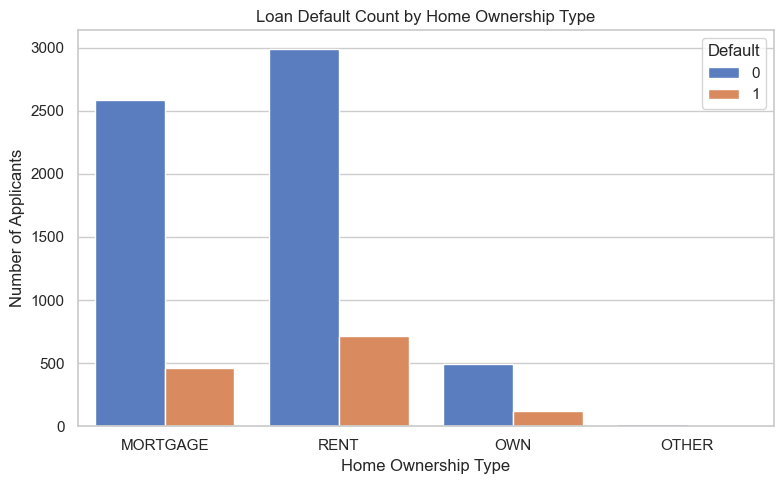

In [48]:
# Count plot to explore default status by home ownership type
sns.countplot(data=df, x='Home', hue='Default', palette='muted')
plt.title("Loan Default Count by Home Ownership Type")
plt.xlabel("Home Ownership Type")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Insight:
##### This plot shows that default rates vary by home ownership status:

- #### Renters form the largest applicant group, with the highest number of both defaulters and non-defaulters. This may reflect broader market size rather than risk level.

- #### Mortgage holders also represent a large group, with a noticeable number of defaults, but slightly fewer than renters.

- #### Homeowners (OWN) show relatively fewer defaults, which may indicate greater financial stability or collateral strength.

- #### Applicants labeled as OTHER are rare and may be less standardized — these might be flagged for closer manual review in a real business setting.

##### This insight can inform loan policy rules: e.g., extra scrutiny on renters or tailored offers for stable homeowners.

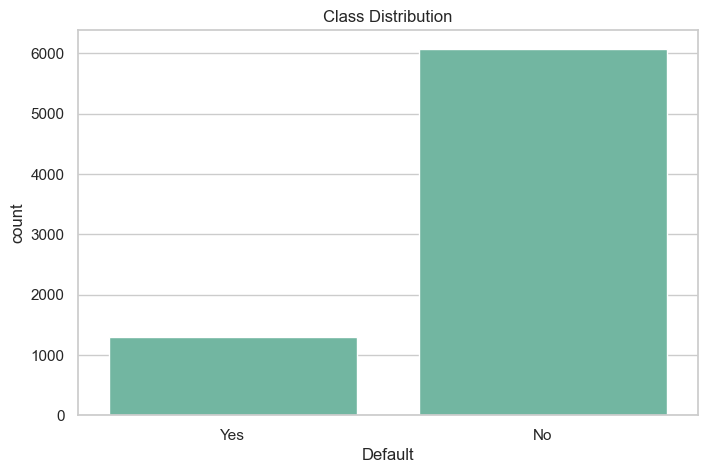

In [50]:
sns.countplot(x=df['Default'].map({1:'Yes', 0:'No'}))
plt.title("Class Distribution")
plt.show()

### Target Class Imbalance:
#### The Default variable shows a significant class imbalance — about 82% non-defaulters and only 18% defaulters. While we’ll train a baseline model first, this imbalance should be addressed later (e.g., using resampling or appropriate evaluation metrics like precision, recall, and AUC) to avoid bias toward the majority class.

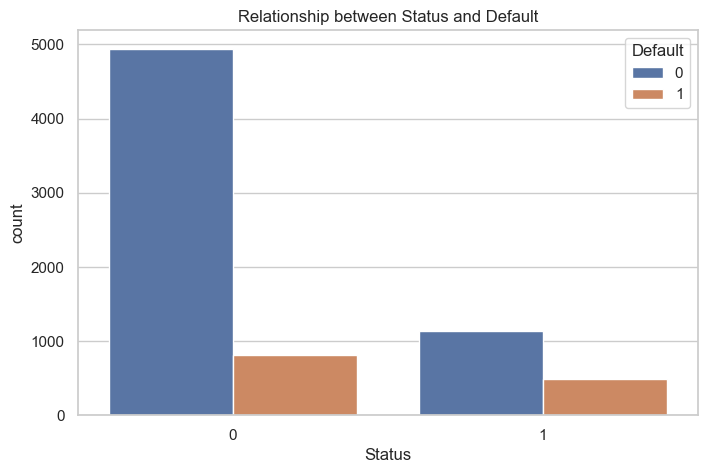

In [52]:
sns.countplot(x='Status', hue='Default', data=df, palette='deep')
plt.title("Relationship between Status and Default")
plt.show()

### Interpretation:
#### Status may represent something like loan approval, repayment history, or current account status.
#### It still helps explain default risk, but doesn't directly "give away" the target.

In [54]:
## Correlation between Status and Default
df[['Default','Status']].corr()

,Default,Status
Default,1.000000,0.170726
Status,0.170726,1.000000


### Status vs Default Analysis:
#### The Status feature shows some association with Default, but with only a 0.17 correlation, it's not highly predictive on its own.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7383 entries, 0 to 8144
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              7383 non-null   int64  
 1   Age             7383 non-null   int64  
 2   Income          7383 non-null   int64  
 3   Home            7383 non-null   object 
 4   Emp_length      7383 non-null   float64
 5   Intent          7383 non-null   object 
 6   Amount          7383 non-null   int64  
 7   Rate            7383 non-null   float64
 8   Status          7383 non-null   int64  
 9   Percent_income  7383 non-null   float64
 10  Default         7383 non-null   int32  
 11  Cred_length     7383 non-null   int64  
dtypes: float64(3), int32(1), int64(6), object(2)
memory usage: 721.0+ KB


# 6. Preprocessing

### Handle Outliers

In [63]:
def outlier_detection(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = (df[col] < lower) | (df[col] > upper) 
    return outliers, lower, upper, IQR

In [65]:
_, lower, upper, _ = outlier_detection(df, 'Amount')
df['Amount'] = np.clip(df['Amount'], lower, upper)

#### Extreme upper outliers in Amount were capped using the IQR method. Since these features are strictly positive, lower bounds were irrelevant, and only the upper end was clipped.
#### This helps reduce the influence of rare, extreme values during model training without distorting valid data ranges.

### Winsorization

In [69]:
# Top income at the 99th percentile
upper_limit = df['Income'].quantile(0.99)
df['Income'] = np.where(df['Income'] > upper_limit, upper_limit, df['Income'])

### Income Outlier Handling:
#### Due to the heavy right-skew in Income, I applied top-end winsorization at the 99th percentile to reduce the influence of extreme high-income applicants. This preserves realistic upper-income cases while avoiding model distortion from a few rare but extreme values.

In [71]:
# Investigating the single outlier
df[df['Age'] > 100]

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
6457,183,144,200000.0,MORTGAGE,4.0,EDUCATION,6000,11.86,0,0.03,0,2


In [72]:
df['Age'] = np.where(df['Age'] > 100, 80, df['Age'])

### Age Outlier Handling:
#### An extreme value of Age = 144 was detected — far beyond the valid applicant range. Since this is likely a data entry error, it was replaced with a reasonable upper age value (80), preserving data integrity while preventing distortion in model training.

In [74]:
# Winsorizing Emp_length at 99th percentile
upper_limit = df['Emp_length'].quantile(0.99)
df['Emp_length'] = np.where(df['Emp_length'] > upper_limit, upper_limit, df['Emp_length'])

### Employment Length Outlier Handling:
#### Although the IQR method flags values above 14.5 as outliers, higher employment lengths (e.g., 20–40 years) are valid for older professionals.
#### Instead of removing or clipping, I applied top-end winsorization at the 99th percentile to preserve real-world experience while reducing the influence of extreme values.

### Interest Rate Check:
#### The Rate feature showed no extreme outliers when analyzed via the IQR method. This suggests that interest rates in the dataset are consistently applied and controlled, likely due to standard lending guidelines.
#### As a result, no transformation was necessary for this feature.

In [81]:
# Winsorizing top 1% of Percent_income
upper_limit = df['Percent_income'].quantile(0.99)
df['Percent_income'] = np.where(df['Percent_income'] > upper_limit, upper_limit, df['Percent_income'])

### Percent Income Outlier Handling:
#### The Percent_income variable, which indicates how much of a person’s income goes toward loan repayment, had 136 high outliers. While these cases reflect higher financial strain, they are not invalid.
#### To reduce their extreme influence while preserving predictive value, I capped the top 1% of values at the 99th percentile using winsorization. This helps the model recognize risk without being distorted by rare extremes.

### Credit Length Outlier Check:
#### Although 224 values in Cred_length exceeded the IQR upper bound (15.5 years), they were retained. Long credit histories often indicate lower risk and are valid for modeling.
#### No transformation was applied — instead, the feature will be scaled using RobustScaler to handle its spread without losing this valuable signal.

In [85]:
#### Dropping ID column as it is useless for modeling
df = df.drop('Id', axis=1)

#### Preview

In [87]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,23,88000.0,MORTGAGE,2.0,MEDICAL,6625,11.22,0,0.0800,1,3
1,23,30000.0,RENT,0.0,PERSONAL,1925,12.18,0,0.0600,0,2
2,32,160000.0,MORTGAGE,9.0,DEBTCONSOLIDATION,12000,7.88,0,0.0700,0,8
3,29,75000.0,OWN,3.0,HOMEIMPROVEMENT,12000,7.51,0,0.1600,0,5
4,22,28800.0,RENT,2.0,VENTURE,14000,7.90,1,0.4818,0,2


# 7. Model Pipeline: Integrated Preprocessing + Training

In [89]:
## Imports 
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Feature Groups

In [91]:
# Target variable
target = 'Default'
# Multi-category columns
multi_cats = ['Home', 'Intent']

passthrough_col = ['Status']
# Numerical columns to scale with RobustScaler
numeric_cols = ['Age', 'Income', 'Amount', 'Rate', 'Percent_income', 'Cred_length', 'Emp_length']

### Preprocessing Transformers

In [93]:
numeric_transformer = RobustScaler()
one_hot_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('multi', one_hot_transformer, multi_cats),
    ('pass', 'passthrough', passthrough_col)
])

### Full Pipeline

In [95]:
# Combine preprocessing and model
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

### Train-Test Split & Model Training

In [103]:
X = df.drop(columns=[target]) 
y = df[target].astype(int)   

In [104]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [105]:
# Train pipeline
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['Age', 'Income', 'Amount',
                                                   'Rate', 'Percent_income',
                                                   'Cred_length',
                                                   'Emp_length']),
                                                 ('multi',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Home', 'Intent']),
                                                 ('pass', 'passthrough',
                                                  ['Status'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [106]:
# Predictions
y_pred = model.predict(X_test)

### Evaluation

In [108]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1129   87]
 [ 185   76]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      1216
           1       0.47      0.29      0.36       261

    accuracy                           0.82      1477
   macro avg       0.66      0.61      0.63      1477
weighted avg       0.79      0.82      0.80      1477



## Model Performance Summary (Logistic Regression)
  ### Baseline Model Evaluation:
  #### The initial logistic regression model achieved an overall accuracy of 82%, correctly identifying the majority of non-defaulted applicants.

- #### Precision for non-defaulters (0) was 0.86, meaning the model is quite reliable when it predicts someone won't default.

- #### Recall for defaulters (1) was only 0.29, indicating the model missed many actual defaults.

#### This is a common outcome in imbalanced datasets, where the model tends to favor the majority class (Default = 0).

  ### Confusion Matrix Summary:

- #### True Negatives (1129): Non-defaulters correctly predicted

- #### False Positives (87): Non-defaulters wrongly predicted as defaulters

- #### False Negatives (185): Actual defaulters missed (model's weakness)

- #### True Positives (76): Correctly identified defaulters

### Business Implication:
#### While the model is accurate overall, its low recall for defaulters could be risky in real lending. If left unaddressed, the business might approve loans to applicants likely to default — which has direct financial consequences.

  #### This baseline model serves as a starting point, and future work will include:

- #### Trying other models (e.g., Decision Trees, Random Forests)

- #### Using class balancing techniques (SMOTE, weighted loss, etc.)

- #### Tuning thresholds to improve default detection

# Multi-Model Evaluation with Preprocessing

## Transform Train & Test Data

In [113]:
# Preprocess X data using the already-fitted preprocessor
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Models

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'SVM': SVC(probability=True)
}

## Evaluation

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

## Display Sorted Results

In [127]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

results_df.style.background_gradient(cmap='Blues', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost,0.814489,0.474308,0.459770,0.466926
1,Gradient Boosting,0.822613,0.497797,0.432950,0.463115
2,Decision Tree,0.804333,0.449275,0.475096,0.461825
3,Random Forest,0.824645,0.504673,0.413793,0.454737
4,Logistic Regression,0.815843,0.466258,0.291188,0.358491
5,SVM,0.826676,0.535211,0.145594,0.228916
6,AdaBoost,0.823290,0.000000,0.000000,0.000000


## Model Benchmarking: Multi-Algorithm Comparison
#### The following models were evaluated using consistent preprocessing and stratified splits. Results are sorted by F1-score to emphasize balance between precision and recall — especially important in our imbalanced default classification problem.

## Optimize XGBoost with Class Balancing + Tuning

In [130]:
# Compute scale_pos_weight = (negative samples / positive samples)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

In [131]:
# Base model with scale_pos_weight
xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train_processed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [132]:
import optuna

C:\Users\HOME\anaconda3\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [133]:
### Tuning

In [134]:
from sklearn.model_selection import cross_val_score
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    lr = trial.suggest_float('learning_rate', 0.01, 0.3)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)  
    colsample = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    # Model
    xgb = XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=lr,
        subsample=subsample,
        colsample_bytree=colsample,
        eval_metric='logloss'
    )

    # Wrap model with preprocessor in a pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', xgb)
    ])

    # Cross-validation
    score = cross_val_score(pipe, X, y, cv=5, scoring='f1', n_jobs=-1).mean()
    return score

In [135]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-06-06 08:52:50,295] A new study created in memory with name: no-name-0bad27dc-d8f9-4d8f-b513-d03fe86df71f
[I 2025-06-06 08:52:52,901] Trial 0 finished with value: 0.5742332402355509 and parameters: {'n_estimators': 353, 'max_depth': 5, 'learning_rate': 0.1749208410101085, 'subsample': 0.6675129775511681, 'colsample_bytree': 0.7991592720257813}. Best is trial 0 with value: 0.5742332402355509.
[I 2025-06-06 08:52:54,733] Trial 1 finished with value: 0.6393263407529787 and parameters: {'n_estimators': 446, 'max_depth': 3, 'learning_rate': 0.08349733342317922, 'subsample': 0.730277315856342, 'colsample_bytree': 0.5923692610184906}. Best is trial 1 with value: 0.6393263407529787.
[I 2025-06-06 08:52:56,206] Trial 2 finished with value: 0.5905137052115801 and parameters: {'n_estimators': 257, 'max_depth': 4, 'learning_rate': 0.2776006500080039, 'subsample': 0.7946092655659343, 'colsample_bytree': 0.5603746791463287}. Best is trial 1 with value: 0.6393263407529787.
[I 2025-06-06 08:52

## Training on tuned Hyper Params

In [143]:
params = {'n_estimators': 474,
 'max_depth': 5,
 'learning_rate': 0.024687814384633976,
 'subsample': 0.8970021827623534,
 'colsample_bytree': 0.7372626581166067}
xgb_final = XGBClassifier(scale_pos_weight = scale_pos_weight, **params)
xgb_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', xgb_final)
    ])
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['Age', 'Income', 'Amount',
                                                   'Rate', 'Percent_income',
                                                   'Cred_length',
                                                   'Emp_length']),
                                                 ('multi',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Home', 'Intent']),
                                                 ('pass', 'passthrough',
                                                  ['Status'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.024687814384633976, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=474,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [144]:
y_pred = xgb_pipeline.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[957 259]
 [ 14 247]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.79      0.88      1216
           1       0.49      0.95      0.64       261

    accuracy                           0.82      1477
   macro avg       0.74      0.87      0.76      1477
weighted avg       0.90      0.82      0.83      1477



## Final Tuned XGBoost Model Summary
### The final model was optimized using cross-validated hyperparameter tuning with class balancing (scale_pos_weight). It achieved:

- #### Accuracy: 82%

- #### Recall (defaulters): 95% — helping the business identify almost all risky applicants

- #### F1-Score: 0.64 — a healthy balance considering the dataset’s class imbalance

## Final Evaluations

### Confusion Matrix Visualization

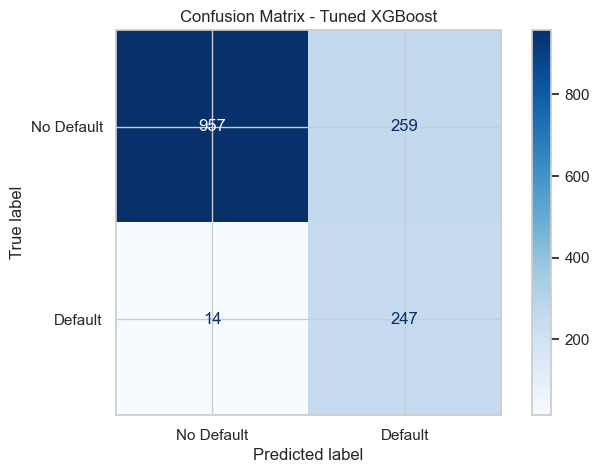

In [148]:
## confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb_pipeline, X_test, y_test, display_labels=['No Default', 'Default'], cmap='Blues')
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()

### ROC Curve

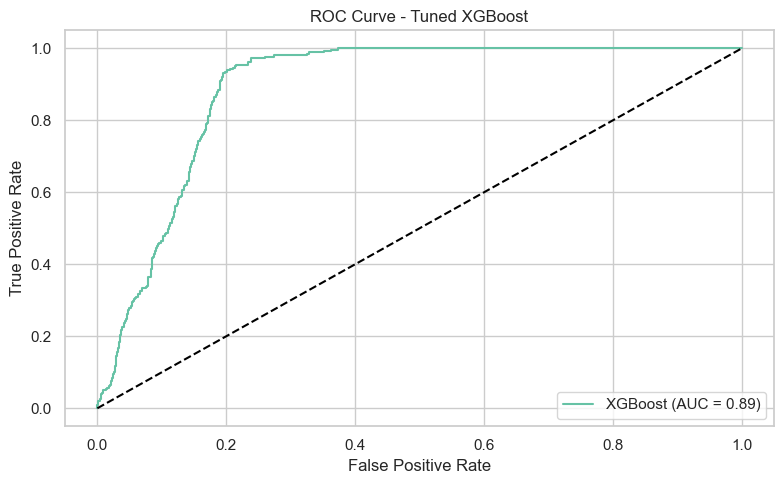

In [150]:
from sklearn.metrics import roc_curve, auc

# probabilities for class 1
y_prob = xgb_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Final Evaluation Metrics
#### To better interpret how well the model distinguishes between defaulters and non-defaulters, I visualize the confusion matrix and ROC curve.
#### These plots provide an intuitive view of the model’s strengths, especially its ability to capture defaults with high recall, while maintaining reasonable overall performance.

# Conclusion and Key Insights

## Project Summary:

#### This project aimed to predict loan default risk using applicant demographic and financial data. I performed a complete data science workflow — from cleaning and preprocessing to model evaluation — to develop a classification model that supports data-driven lending decisions. 

## Key Steps Taken:

- #### Handled missing values thoughtfully, using business context (e.g., filling employment length, dropping rows with missing rates).

- #### Visualized key features like Amount, Income, Intent, and Home to understand data distributions and default behavior.

- #### Detected and treated outliers using IQR and winsorization, ensuring robust feature scaling.

- #### Built a clean pipeline combining preprocessing (scaling, encoding) and modeling to prevent data leakage.

- #### Benchmarked multiple models, with XGBoost emerging as the most balanced performer.


## Final Model Insights:

- #### XGBoost with class balancing and tuning achieved:

    - #### Accuracy: 82%

    - #### Recall for Defaulters: 95% 

    - #### F1 Score: 0.64 — significantly better than baseline

- #### Visual tools like the confusion matrix and ROC curve confirmed the model's strength in identifying high-risk applicants, a critical need in financial lending.

## Business Value:

#### This model provides a powerful, automated tool to support loan risk evaluation. By prioritizing recall for default prediction, it helps minimize potential losses while still maintaining overall performance. It’s ready for deployment, further testing, or integration into a credit risk decision system.
